In [2]:
import os
from astropy.io import ascii
import numpy.ma as ma
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import math
from astropy.table import Table, vstack
from cStringIO import StringIO
import base64
from IPython.display import display, HTML
import pandas as pd
# Turn off the max column width so the HTML 
# image tags don't get truncated 
pd.set_option('display.max_colwidth', -1)

# Turning off the max column will display all the data in
# our arrays so limit the number of element to display
pd.set_option('display.max_seq_items', 2)

In [3]:
main_dir = '/scratch/aries/gt_bbh/'

fieldnames = ['No.', 'RunDir', 'D', 'q', 'a1', 'a2', 'th1L', 'th2L', 
                  'ph1', 'ph2', 'th12', 'thSL', 'thJL', 'Mmin(f=30Hz)', 'Mmin(f=10Hz)']

waveforms = Table()

for series_dir in os.walk(main_dir).next()[1]:
    par_file = main_dir+series_dir+'/README_'+series_dir+'.txt'
    par_dic = ascii.read(par_file,names=fieldnames)
    parameters = Table(par_dic)
    # parameters.add_columns(('time', 'h+', 'hx'))
    pathnames, times, hp, hx = [], [], [], []
    for i in xrange(len(parameters)):
        os.path.join(main_dir,series_dir,parameters[i]['RunDir'])
        try:
            for filename in os.listdir(os.path.join(main_dir,series_dir,parameters[i]['RunDir'])):
                    if filename.endswith('.asc'):
                        pathname = os.path.join(main_dir,series_dir,parameters[i]['RunDir'],filename)
                        pathnames.append(pathname)
                        data = ascii.read(pathname)
                        #for name in fieldnames:
                        #    wf_dic[name] = par_dic[name][wf_num]
                        times.append(np.array(data['t_sim']))
                        hp.append(data['h_+'])
                        hx.append(data['h_x'])
        except:
            pathnames.append('')
            times.append([])
            hp.append([])
            hx.append([])
            
    parameters['times'], parameters['h+'], parameters['hx'] = times, hp, hx
    waveforms = vstack([waveforms, parameters])

In [3]:
def sparkline(x,y,z, figsize=(4,0.35)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.plot(x, y, alpha=1)
    ax.plot(x, z, alpha=0.8)
    for k,v in ax.spines.items():
        v.set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
    img = StringIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()))
waveforms['sparklines'] = map(sparkline, waveforms['times'], waveforms['h+'],waveforms['hx'])

In [4]:
#HTML('<h3>Table of NR Waveforms</h3>' + waveforms.to_pandas()[['sparklines',  'q', 'a1', 'a2', 'th1L', 'th2L', 
#                  'ph1', 'ph2', 'th12', 'thSL', 'thJL', ]].to_html(escape=False))

In [5]:
import gwgpr
import gwgpr.nr as nr

In [6]:
cat = nr.NRCatalogue('/scratch/aries/gt_bbh/')
cat_f = nr.NRCatalogue('/scratch/aries/gt_bbh/')
#cat.waveforms = cat.waveforms[cat.waveforms['series']=='S-series-v2']
cols = ['q', 'a1','a2', 'th1L', 'ph1', 'th12', 'thSL', 'thJL']

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#cat.waveforms = cat.waveforms[(cat.waveforms['series']=='S-series-v2') & (cat.waveforms['D']==6.2)]
cols = ['q', 'a1','a2', 'th1L', 'ph1', 'th12', 'thSL', 'thJL']

In [191]:
locs = [(times>-100) & (times<100)]

In [192]:
len(locs)

1

In [393]:
wave = cat.load(waveform[0])
times = wave.times
hp = wave.data[0]

In [248]:
locs = [(times>-50) & (times<50)]

In [251]:
np.sum(locs)

749

In [268]:
out = []
out.append(times[0])
out.extend(params[0])

In [271]:
len(training_x)

21690

In [1]:
times

NameError: name 'times' is not defined

In [468]:
SKIP = 5
cols = ['q', 'a1','a2', 'th1L', 'ph1', 'th12', 'thSL', 'thJL']
import numpy as np
training_x = []
training_y = []
for waveform in cat.waveforms[cols].iterrows():
    try:
        wave = cat.load(waveform[0])
        times = wave.times
        hp = wave.data[0]
        hc = wave.data[1]
        # Select a limited time span from -200 to 100
        #locs = times == 0 #
        locs = [(times>-30) & (times<10)]
        locs = [locs[0]]
        N = len(times[locs][::SKIP])
        data = np.array(hp)[locs][::SKIP]
        params = [list(waveform[1])]*N
        times = times[locs][::SKIP]
        if np.isnan(params).any():
            print "{} contains nan".format(waveform[0])
            continue
        for i in xrange(N):
            out = []
            out.append(times[i])
            out.extend(params[i])
            training_x.append(out)
        training_y.extend(list(data))
        #training.append( times[locs][::4], params, data) 
        #print zip(cols, list(waveform[1]))
    except:
        print "{} unvailable".format(waveform[0])

19 unvailable
20 unvailable
30 unvailable
34 unvailable
38 unvailable
39 unvailable
40 unvailable
87 unvailable
105 contains nan
111 contains nan
116 contains nan
124 contains nan
128 contains nan
129 contains nan
130 contains nan
131 contains nan
132 contains nan
134 contains nan
137 contains nan
146 contains nan
147 contains nan
149 contains nan
151 contains nan
155 contains nan
156 unvailable
157 contains nan
165 contains nan
166 contains nan
167 contains nan
168 contains nan
169 contains nan
170 contains nan
171 contains nan
176 contains nan
179 contains nan
180 contains nan
182 contains nan
183 contains nan
187 contains nan
189 contains nan
261 unvailable
268 contains nan
269 contains nan
270 contains nan
271 contains nan
272 contains nan
273 contains nan
274 contains nan
275 contains nan
276 contains nan
277 contains nan
278 contains nan
279 contains nan
280 contains nan
281 contains nan
282 contains nan
283 contains nan
284 contains nan
285 contains nan
286 contains nan
287 cont

In [469]:
times = np.linspace(-100, 100, 300)
N = 300
#data = hp[locs][::4]
params =  [[1.0,  0.81,  0.8, 30.0, 180.0, 60.0, 60.0, 17.0]]*N
#times = times[locs][::4]
eval_x = []
for i in xrange(N):
    out = []
    out.append(times[i])
    out.extend(params[i])
    eval_x.append(out)

In [ ]:
import george
from george import kernels
#sep = training_data[1]-training_data[0]
#sep_rat = np.diff(ratios[::2])[0]/4
k0 =  np.std(training_y)**2
#k1 =  kernels.ExpSquaredKernel([sep[0]**2, sep_rat**2], axes = [0,1], ndim=2)
#k2 =  kernels.ExpSquaredKernel([sep[0]**2, sep_rat**2], axes = [0,1], ndim=2)
#k2 =  kernels.ExpSquaredKernel([sep[0]**2, sep_rat**2], axes = [0,1], ndim=2)
#k3 = kernels.Matern52Kernel([sep[0]**2, sep_rat**2], axes=[0,1], ndim=2)
#sep = np.array([0.83, 0.0001, 0.2, 0.2, 20, 90, 50, 25,  10])
sep = np.array([0.66, 0.83, 0.2, 0.2, 20, 90, 50, 25,  10])
#sep = np.array([0.83, 0.2, 0.2, 20, 90, 50, 25,  10])
k3 = kernels.Matern52Kernel(sep**2, ndim=9)
kernel = k0+k3 #k0 + (k1 * k2)
gp = george.GP(kernel, tol=1e-6, solver=george.HODLRSolver, mean=.0067709526986988872)
#gp.set_vector([ -7.58918753,  -0.37265916, -18.42068074,  -3.21887582,
#        -3.21887582,   5.99146455,   8.99961934,   7.82404601,
#         6.43775165,   4.60517019])
#gp.set_vector([  -7.58918753,-0.37265916,  -3.21887582,
#        -3.21887582,   5.99146455,   8.99961934,   7.82404601,
#         6.43775165,   4.60517019])
gp.set_vector([-6.25340862, -0.83103089/20, -0.37265916, -3.21887582, -3.21887582,
        5.99146455,  8.99961934,  7.82404601,  6.43775165,  4.60517019])
gp.compute(training_x)
training_x = np.array(training_x)

In [458]:
from scipy.optimize import minimize
def neg_ln_like(p):
    gp.set_vector(p)
    return -gp.lnlikelihood(training_y)

def grad_neg_ln_like(p):
    gp.set_vector(p)
    return gp.grad_lnlikelihood(training_y)

In [459]:
minimize(neg_ln_like, gp.get_vector(), method="BFGS", ) #jac=grad_neg_ln_like

      fun: 6721033.5739107374
 hess_inv: array([[ 7.37256655,  0.07845486,  0.33148783,  6.498633  ,  0.26146708,
         7.48870168, -5.00829609,  1.12360037,  4.63805641,  3.52922378],
       [ 0.07845486,  0.73093128,  0.06621803,  0.10454747,  0.03420089,
         0.01364793, -0.05679196, -0.33717958, -0.23026987,  0.07006821],
       [ 0.33148783,  0.06621803,  0.60488505,  0.8128859 , -0.15069208,
         0.59540564, -0.69666052,  0.19947696,  0.40095202,  0.3643865 ],
       [ 6.498633  ,  0.10454747,  0.8128859 ,  7.0449802 ,  0.45353219,
         7.41731749, -4.58271612,  1.10499106,  4.64298745,  3.37098574],
       [ 0.26146708,  0.03420089, -0.15069208,  0.45353219,  0.94512121,
         0.39041612, -0.37780563,  0.11016588,  0.26021209,  0.21555442],
       [ 7.48870168,  0.01364793,  0.59540564,  7.41731749,  0.39041612,
         9.68888927, -5.6788481 ,  1.18986533,  5.32266818,  4.06691586],
       [-5.00829609, -0.05679196, -0.69666052, -4.58271612, -0.37780563,
    

In [437]:
np.sqrt(np.exp(gp.get_vector()))

array([  4.38621152e-02,   9.79438457e-01,   8.29999998e-01,
         2.00000001e-01,   2.00000001e-01,   2.00000000e+01,
         9.00000000e+01,   5.00000000e+01,   2.50000000e+01,
         1.00000086e+01])

In [438]:
gp.lnlikelihood(training_y)

-23168.637834215839

In [340]:
training_x[5]

array([ -48.15333333,    1.        ,    0.8       ,    0.8       ,
         60.        ,  180.        ,   30.        ,   75.        ,   22.        ])

In [460]:
p = gp.predict(training_y, eval_x[:300])
#q = gp.predict(training_y, training_x)

In [461]:
np.sqrt(np.mean(q[1]**2))

0.0085073030867628702

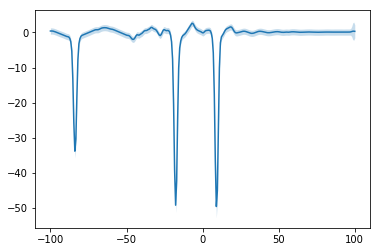

In [463]:
plt.plot(times, p[0])
plt.fill_between(times, p[0]-np.diag(p[1]),p[0]+np.diag(p[1]), alpha=0.25)
#plt.plot(q[0])
#plt.ylim([-1,1])
#plt.fill_between(p[0]+np.diag(p[1]), p[0]-np.diag(p[1]))

In [464]:
resolution = 100
cols_axis = {
    "times": np.linspace(-100, 100, resolution),
    "q": np.linspace(0, 10, resolution),
    "a1" : np.linspace(0, 1, resolution),
    "a2": np.linspace(0, 1, resolution),
    "th1L": np.linspace(0, 180, resolution),
    "ph1": np.linspace(-180, 180, resolution),
    "th12": np.linspace(0, 180, resolution),
    "thSL": np.linspace(0, 180, resolution),
    "thJL": np.linspace(0, 45, resolution)
}
cols = ['times', 'q', 'a1', 'a2', 'th1L', 'ph1', 'th12', 'thSL', 'thJL'] 

In [465]:
def gen2plane(col1, col2, intersept = [ 0,  1.5,    0.8,    0.8,   60. ,  180. ,   30. ,   75. ,   22. ], resolution = 100):
    
    pdata = np.zeros((100,100))
    udata = np.zeros((100,100))
    
    col1_ax = cols_axis[col1]
    col2_ax = cols_axis[col2]
    #
    col1_loc = cols.index(col1)
    col2_loc = cols.index(col2)
    #
    xv, yv = np.meshgrid(col1_ax, col2_ax, sparse=False, indexing='xy')
    for i in xrange(100):
        for j in xrange(100):
            new_vec = np.copy(intersept)
            new_vec[col1_loc] = xv[i,j]
            new_vec[col2_loc] = yv[i,j]
            # Calculate the spin/mass surface for time = 0.00
            
            pdata[i][j], udata[i][j] = gp.predict(training_y, [new_vec])
    return pdata, udata, [col1_ax.min(), col1_ax.max(), col2_ax.min(), col2_ax.max()]

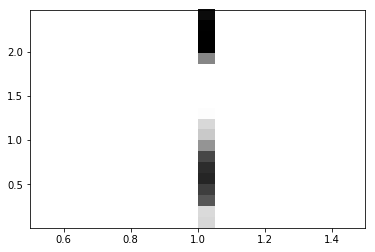

In [466]:
h = plt.hist2d(wv[:,1], np.sqrt(diffs**2).sum(axis=1), bins=20, cmap="Greys")

(array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [  45.,  195.,  237.,  301.,  172.,   20.,    0.,    0.,  154.,
          622.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5]),
 array([ 0.00360403,  0.12829319

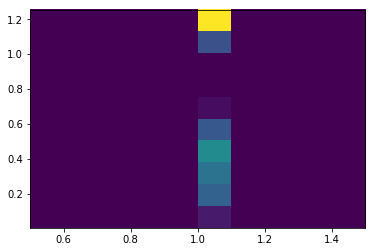

In [467]:
plt.hist2d(wv[:,1], np.sqrt((diffs**2).sum(axis=1)))

In [35]:
wv = training_x
pars = [   1.5,    0.8,    0.8,   60. ,  180. ,   30. ,   75. ,   22. ]
diffs = np.array(wv / wv.max()) - pars/np.array(wv.max())
ax[j,i].hist2d(wv[:,cols[i]], np.sqrt((diffs**2).sum(axis=1)), bins=20,);

/home/daniel/.virtualenvs/heron/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [158]:
1/np.exp(gp.kernel.get_vector())

array([  1.40662556e+03,   1.45397371e+00,   2.49682064e+01,
         2.49786421e+01,   2.49951496e-03,   1.23456776e-04,
         4.00022318e-04,   1.59998824e-03,   9.94527696e-03])

In [384]:
np.array(training_x).max()

180.0

Producing plot at 0 0
Producing plot at 0 1
Producing plot at 0 2
Producing plot at 0 3
Producing plot at 0 4
Producing plot at 0 5
Producing plot at 0 6
Producing plot at 0 7
Producing plot at 0 8
Producing plot at 1 0
Producing plot at 1 1
Producing plot at 1 2
Producing plot at 1 3
Producing plot at 1 4
Producing plot at 1 5
Producing plot at 1 6
Producing plot at 1 7
Producing plot at 1 8
Producing plot at 2 0
Producing plot at 2 1
Producing plot at 2 2
Producing plot at 2 3
Producing plot at 2 4
Producing plot at 2 5
Producing plot at 2 6
Producing plot at 2 7
Producing plot at 2 8
Producing plot at 3 0
Producing plot at 3 1
Producing plot at 3 2
Producing plot at 3 3
Producing plot at 3 4
Producing plot at 3 5
Producing plot at 3 6
Producing plot at 3 7
Producing plot at 3 8
Producing plot at 4 0
Producing plot at 4 1
Producing plot at 4 2
Producing plot at 4 3
Producing plot at 4 4
Producing plot at 4 5
Producing plot at 4 6
Producing plot at 4 7
Producing plot at 4 8
Producing 

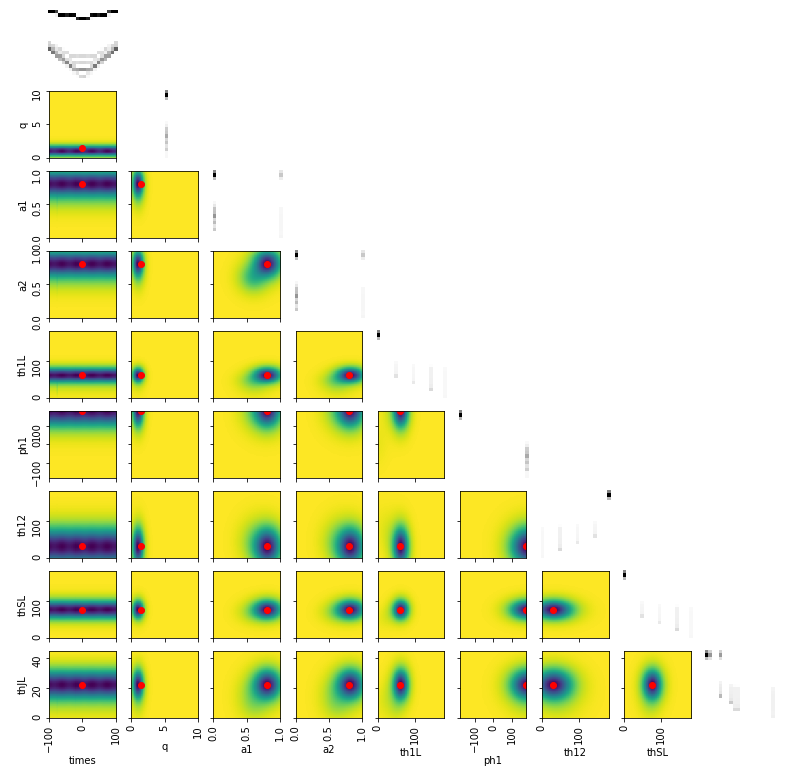

In [450]:
f, ax = plt.subplots(len(cols), len(cols), figsize = (13,13))
for i in range(0,len(cols)):
    for j in range(0,len(cols)):
        print "Producing plot at {} {}".format(i, j)
        if j<i: 
            ax[j,i].axis('off')
            continue
        elif i == j:
            ax[j,i].axis("off")
            #plt.setp(ax[j,i].get_yticklabels(), visible=True)
            #plt.setp(ax[j,i].get_xticklabels(), visible=False)
            wv = np.array(training_x)
            pars = [  0,  1.5,    0.8,    0.8,   60. ,  180. ,   30. ,   75. ,   22. ]
            diffs = np.array(wv / wv.max()) - pars/np.array(wv.max())
            ax[j,i].hist2d(wv[:,i], np.sqrt((diffs**2).sum(axis=1)), bins=20, cmap='Greys');
            
        else:
            
            plt.setp(ax[j,i].get_xticklabels(), visible=False, rotation='vertical');
            plt.setp(ax[j,i].get_yticklabels(), visible=False, rotation='vertical');
            pdata, udata, extent = gen2plane(cols[i], cols[j])
            ax[j,i].imshow(udata, extent = extent, aspect = (extent[1] - extent[0]) / (extent[3] - extent[2]), origin='lower')
            ax[j,i].plot(pars[i], pars[j], 'o', c='red')
        plt.savefig("draft.png")
for i,val in enumerate(cols):
    ax[-1,i].set_xlabel(val);
    plt.setp(ax[-1,i].get_xticklabels(), visible=True, rotation='vertical');
    ax[i, 0].set_ylabel(val);
    plt.setp(ax[i, 0].get_yticklabels(), visible=True)

In [180]:
spacings = np.exp(gp.kernel.get_vector())**0.5
spacings = spacings[1:]
samp_cols_axis = {
    #"times"
    "q": np.arange(0+10%spacings[0]/2, 10, spacings[0]),
    "a1" : np.arange(0+1%spacings[1]/2, 1, spacings[1]),
    "a2": np.arange(0+1%spacings[2]/2, 1, spacings[2]),
    "th1L": np.arange(0+180%spacings[3]/2, 180, spacings[3]),
    "ph1": np.arange(-180+360%spacings[4]/2, 180, spacings[4]),
    "th12": np.arange(0+180%spacings[5]/2, 180, spacings[5]),
    "thSL": np.arange(0+180%spacings[6]/2, 180, spacings[6]),
    "thJL": np.arange(0+45%spacings[7]/2, 45, spacings[7])
}
def sample_grid(col1, col2):
    
    resolution = 100

    col1_ax = samp_cols_axis[col1]
    col2_ax = samp_cols_axis[col2]
    #
    col1_loc = cols.index(col1)
    col2_loc = cols.index(col2)
    #
    xv, yv = np.meshgrid(col1_ax, col2_ax, sparse=False, indexing='xy')
    return xv, yv
    

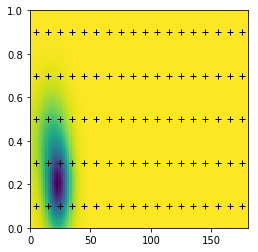

In [172]:
pdata, udata, extent = gen2plane("thJL", "a1")
plt.imshow(udata, extent = extent, aspect = (extent[1] - extent[0]) / (extent[3] - extent[2]))
xv, yv = sample_grid("thJL", "a1")
for i in xrange(xv.shape[0]):
        for j in xrange(yv.shape[1]):
            plt.plot(xv[i,j], yv[i,j], '+', c='black')

In [167]:
np.exp(gp.kernel.get_vector())**0.5

array([  2.66631065e-02,   8.29319206e-01,   2.00127296e-01,
         2.00085486e-01,   2.00019404e+01,   9.00000053e+01,
         4.99986052e+01,   2.50000919e+01,   1.00274743e+01])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8


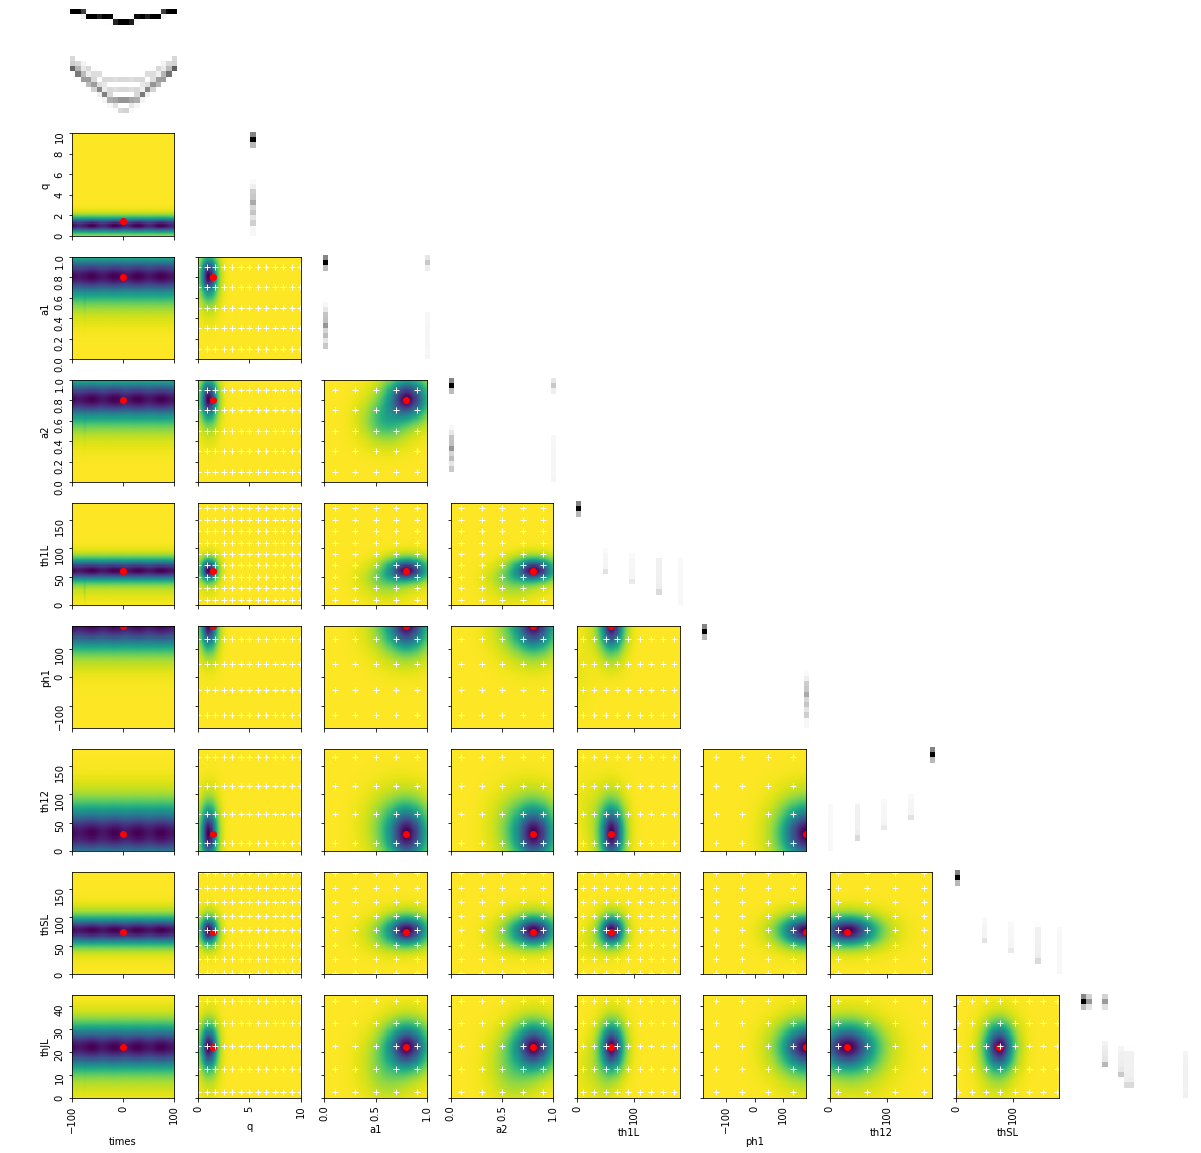

In [453]:
f, ax = plt.subplots(len(cols), len(cols), figsize = (20,20))
for i in range(len(cols)):
    for j in range(len(cols)):
        print i,j
        if j<i: 
            ax[j,i].axis('off')
            continue
        elif i == j:
            ax[j,i].axis("off")
            wv = training_x
            #pars = [   1.5,    0.8,    0.8,   60. ,  180. ,   30. ,   75. ,   22. ]
            pars = [  0,  1.5,    0.8,    0.8,   60. ,  180. ,   30. ,   75. ,   22. ]
            diffs = np.array(wv / wv.max()) - pars/np.array(wv.max())
            ax[j,i].hist2d(wv[:,i], np.sqrt((diffs**2).sum(axis=1)), bins=20, cmap='Greys');
            
        else:
            
            plt.setp(ax[j,i].get_xticklabels(), visible=False, rotation='vertical');
            plt.setp(ax[j,i].get_yticklabels(), visible=False, rotation='vertical');
            pdata, udata, extent = gen2plane(cols[i], cols[j])
            ax[j,i].imshow(udata, extent = extent, aspect = (extent[1] - extent[0]) / (extent[3] - extent[2]), origin='lower')
            ax[j,i].plot(pars[i], pars[j], 'o', c='red')
            if (cols[i] != "times") and (cols[j] != "times"):
                xv, yv = sample_grid(cols[i], cols[j])
                for a in xrange(xv.shape[0]):
                    for b in xrange(yv.shape[1]):
                        ax[j,i].plot(xv[a,b], yv[a,b], '+', c='white')
        plt.savefig("spacings.pdf")
for i,val in enumerate(cols):
    ax[-1,i].set_xlabel(val);
    plt.setp(ax[-1,i].get_xticklabels(), visible=True, rotation='vertical');
    ax[i, 0].set_ylabel(val);
    plt.setp(ax[i, 0].get_yticklabels(), visible=True)
    
plt.savefig("spacings.pdf")

In [212]:
def neg_ln_like(p):
    gp.set_vector(p)
    return -gp.lnlikelihood(training_y)

def grad_neg_ln_like(p):
    gp.set_vector(p)
    return gp.grad_lnlikelihood(training_y)

In [ ]:
from scipy.optimize import minimize

In [ ]:
gp.get_vector()

In [ ]:
minimize(neg_ln_like, gp.get_vector(), method="BFGS", jac=grad_neg_ln_like)

In [29]:
import seaborn as sn

In [31]:
cols

['q', 'a1', 'a2', 'th1L', 'ph1', 'th12', 'thSL', 'thJL']

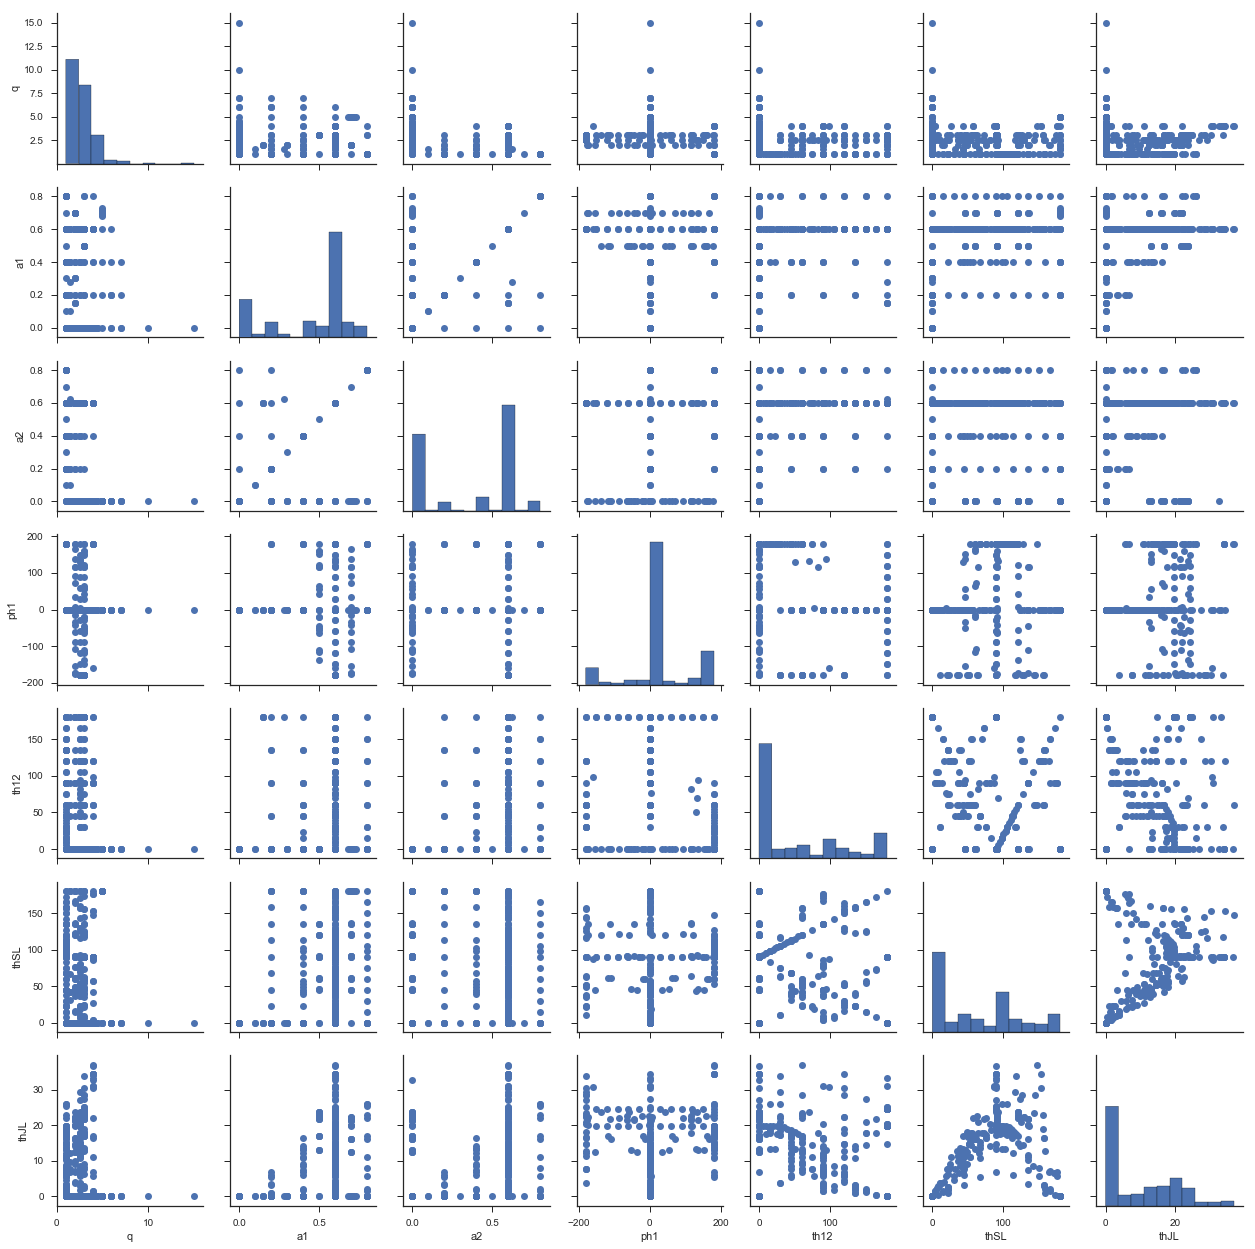

In [32]:
sn.set_style("ticks")
cols2 = ['q', 'a1', 'a2',  'ph1', 'th12', 'thSL', 'thJL']
a = sn.pairplot(cat.waveforms[cols2[:]], kind='scatter')

sn.despine()
a.savefig('parameters.pdf')

In [377]:
np.array(cat.waveforms[cols][3:4])

array([[   1. ,    0.6,    0.6,   15. ,  180. ,   75. ,   52.5,   11.1]])

In [372]:
import pickle

In [398]:
with open("../scripts/fledgling.gp") as data:
    gp = pickle.load(data)

In [399]:
gp.predict(training_y, training_x[10])

ValueError: Dimension mismatch

In [400]:
training_y

[0.32503069495121512,
 0.18196634202513107,
 0.19070880668784362,
 0.3144845375537082,
 0.24926598674947148,
 0.21630390796173854,
 0.26298806442678718,
 0.23305160141796694,
 0.22156457353993636,
 0.2903082185640613,
 0.34989390897858286,
 0.29777025715349748,
 0.40157146787340864,
 0.18918260426235006]

In [387]:
training_x[10]

[-91.553333333333313,
 1.0,
 0.80000000000000004,
 0.80000000000000004,
 60.0,
 180.0,
 30.0,
 75.0,
 22.0]

In [381]:
gp.get_vector()

array([ -7.21061334,  -0.37265916, -18.42068074,  -3.21887582,
        -3.21887582,   5.99146455,   8.99961934,   7.82404601,
         6.43775165,   4.60517019])

In [384]:
len([  0,  1. ,    0.6,    0.6,   15. ,  180. ,   75. ,   52.5,   11.1])

9